# "Generalized Linear Models"
> "My reference notebook for the glm."

- author: Christopher Thiemann
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [statistics, regression]
- hide: false
- search_exclude: true
- image: images/poisson.png

#hide
Hello This is a markdown page {% cite signaltrain %}

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%load_ext rpy2.ipython

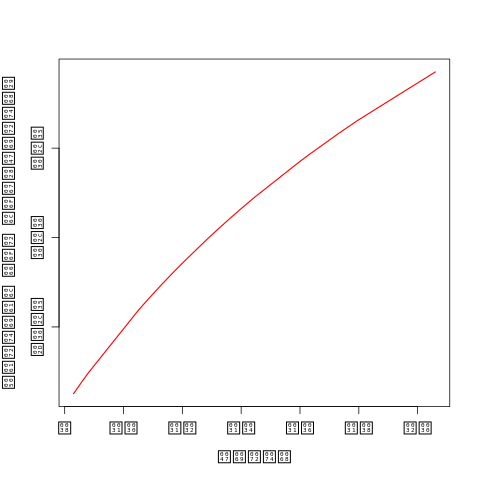

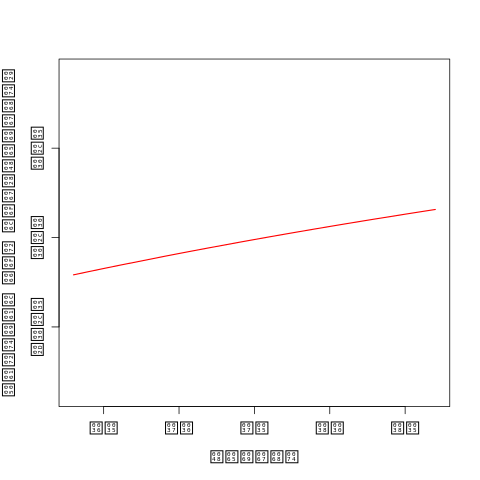

In [181]:
%%R
library(GLMsData)
library(statmod)
data(trees)
test <- glm(Volume ~ log(Girth) + log(Height),
                       family=Gamma(link=log),
                       data = trees)
termplot(test)

In [177]:
df = %R trees
from math import e
df['const'] = e
model = sm.GLM(df.Volume,
               np.log(df[['Girth', 'Height', 'const']]),
              family = sm.families.Gamma(sm.families.links.log())).fit()

print(model.get_hat_matrix_diag(observed = False))

[0.15137988 0.16720986 0.19753587 0.05885776 0.12137312 0.15204507
 0.11943164 0.05063703 0.09064522 0.0464631  0.07215894 0.04640131
 0.04640131 0.07274876 0.0355806  0.0356386  0.11634535 0.12550467
 0.07113393 0.24276869 0.03750002 0.04611522 0.05388005 0.11447309
 0.07092367 0.08546694 0.09158618 0.0982445  0.10062086 0.10062086
 0.1803079 ]


In [76]:
from scipy.stats import gamma, norm
aaa = gamma.cdf(df.Volume, model.predict(), loc = model.predict(), scale =  1 / model.scale)
df_test = pd.DataFrame()
norm.ppf(aaa, loc=0, scale=1)
#df_test['quantile_residuals'].clip(-10, 10, inplace = True)

array([-12.60016831, -12.07476618, -12.88977745,         -inf,
               -inf,         -inf,         -inf,         -inf,
       -16.48231214, -18.93575586, -16.01097737, -18.90184158,
       -17.68074307, -15.89876804,         -inf,         -inf,
       -19.20825567,         -inf,         -inf,         -inf,
       -20.65439011,         -inf, -19.99125293, -29.28298215,
               -inf, -25.73351869, -27.19694238, -26.49680107,
               -inf,         -inf,         -inf])

In [161]:
from tweedie import tweedie
norm.ppf(gamma.cdf( df.Volume/ model.predict() / model.scale, 1 / model.scale )
, loc=0, scale=1)

gamma.cdf( df.Volume[0] , 
          a=  1 / (model.scale * model.predict()[0]),          loc = model.predict()[0],
          scale = np.sqrt(model.scale * model.predict()[0] ** 2))

6.376862177015887e-23

In [142]:
(df.Volume - model.predict())[0] / (model.scale * model.predict())[0] ** 2)

0.2979869527983411

In [112]:
from scipy.optimize import minimize_scalar

tweedie(p=2, mu=model.predict()[0], phi=model.scale).cdf(df.Volume[0])



0.6050873519451425

## Motivation

## The Model

## Diagnostics

### Residuals

#### Respones Residual

*Response residuals* are defined as 

$y_i - \hat{\mu}_i$

the problem with this definition is that these residuals are not necessarily normal when $y_i$ is from an EDM for example a Gamma distribution.

#### Pearson Residuals

This motivates the use of *person residuals* which basicyally scale the respose residual such that they have constant variacne

$r_P = \frac{y-\hat{\mu}}{\sqrt{V(\hat{\mu})/w}} $

THe *deviance residuals are defined as 

$r_D = sign(y-\hat{\mu})\sqrt{w d(y-\hat{\mu})}$

#### Quantile Residuals

### Leverages

#Python
fitted_model.get_hat_matrix_diag(observed = False)

#R
hatvalues(fitted_model)

### Independence

Plot Residuals in a lagged plot i.e. $e_i$ against $e_{i-1}$

### Check systematic component

standadized deviance and /or quantile against explanatory variables

there should be no trends

constant variance

fr fitted agaisnt residuals transform muhat

In [180]:
%%R
library(BostonHousing)

R[write to console]: Fehler in library(BostonHousing) : 
  es gibt kein Paket namens ‘BostonHousing’

R[write to console]: Zusätzlich: 
R[write to console]: Warnmeldung:

R[write to console]: package ‘BostonHousing’ is not available (for R version 3.6.3) 




Fehler in library(BostonHousing) : 
  es gibt kein Paket namens ‘BostonHousing’


### Assumptions

### Some Theory

### Interpretation

### Extensions

## Simulations

## Real world example

## Helper Functions

## Plot for the Blog Post

## References

{% bibliography --cited %}